## How Well do Jobs and Skills Pay for Data Analysts?

### Methodology:

1. Evaluate medians salary for top 6 data jobs.
2. Find median salary per skill for Data Analysts.
3. Visualize for highest and most paying skills 

In [1]:
#Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 
import ast
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [13]:
df_US = df[df['job_country'] == 'United States'].dropna(subset=['salary_year_avg']).copy() #create df of US only data, dropping any NaN salary values
job_titles = [x for x in list(df_US['job_title_short'].value_counts().index) if 'Data' in x]  #picking up all data related job titles
df_US_top_6 = df_US[df_US['job_title_short'].isin(job_titles)] #filtering for only those that match job_titles


In [15]:
job_order = df_US_top_6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index 
#this will give us the order of median salaries for each job title from greatest to least

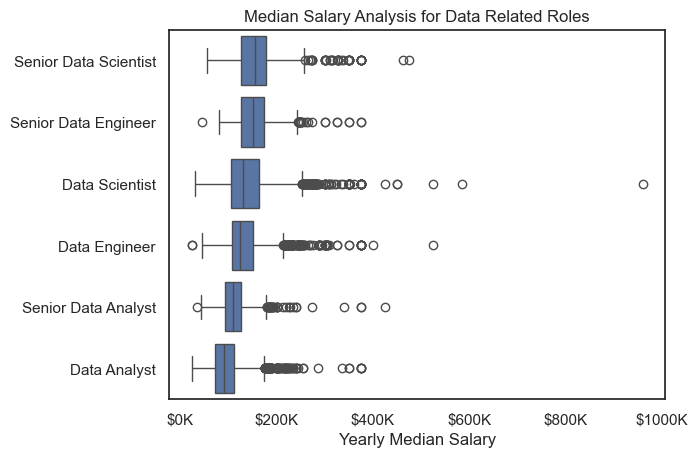

In [24]:
sns.boxplot(data=df_US_top_6, x='salary_year_avg', y='job_title_short', order=job_order)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax.set_xlabel('Yearly Median Salary')
ax.set_ylabel('')
plt.title('Median Salary Analysis for Data Related Roles')
plt.show()

## Investigate Median Salary Vs Skill for Data Analysts

In [26]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy() #filtering US Data Analyst roles
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US= df_DA_US.explode('job_skills') #exploding the job skills column will match each skill to its corresponding job title
 

In [31]:
df_DA_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False) 
#aggregating number of skills and the median salary for each skill, and sorting by highest median salary
df_DA_top_pay = df_DA_top_pay.head(10) # only concerned about the top 10
df_DA_top_pay




,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [32]:
df_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False) 
#sorting by highest skill counts 
df_skills = df_skills.head(10).sort_values(by='median', ascending=False)
df_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


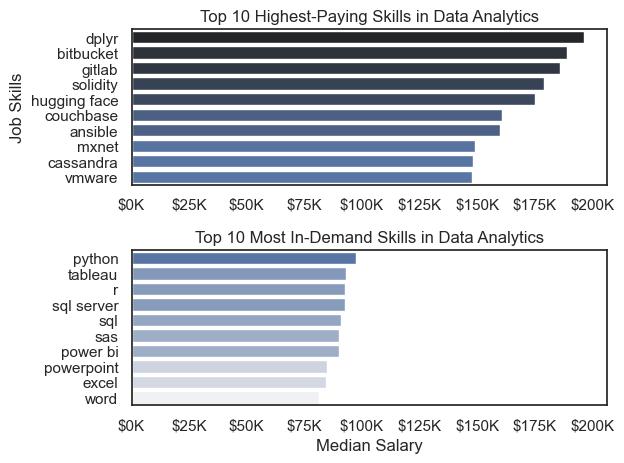

In [33]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style='ticks')


sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r') #plotting highest paying skills
ax[0].set_title('Top 10 Highest-Paying Skills in Data Analytics')
ax[0].legend().remove()
ax[0].set_xlabel('')
ax[0].set_ylabel('Job Skills')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))





sns.barplot(data=df_skills, x='median', y=df_skills.index, ax=ax[1], hue='median', palette='light:b') #plotting top 10 most frequent skills
ax[1].set_title('Top 10 Most In-Demand Skills in Data Analytics')
ax[1].legend().remove()
ax[1].set_xlabel('Median Salary')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

fig.tight_layout()
plt.show()